In [1]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Correlation  and Regression review

## Correlation Coefficient 
$$\large -1 \leq \rho = np.mean(x^* y^*) \leq 1 $$
$\large x^* = \frac{x - \hat{x}}{\sigma_x}$

$\large y^* = \frac{y - \hat{y}}{\sigma_y}$

** Correlation measures linear association.**

**It gives you an idea of how well x predicts y. **

** Correlation is the slope of the best-fit line in standard units.**

**Correlation has no units. It is a pure number**

** Beware of ecological correlation! (What is that?)**



## Regression Vocabulary

**Models** - sets of assumptions about the data

**Regression models** - sets of assumptions about randomness in roughly linear scatter plots

**Fitted value** - a prediction of y based on a value of x

**Prediction interval** - a confidence interval of fitted values


## Regression line

**Underlying model:** $\large y = slope \times x + intercept$

**Slope** =  $\large \rho \frac{SD_y}{SD_x}$

**Intercept** = $\large \bar{y} - slope \times \bar{x}$

In [2]:
#based on a famous experiment by Karl Pearson around 1903
heights = Table().read_table('datasets/heights.csv')
heights

Father,Son
65,59.8
63.3,63.2
65,63.3
65.8,62.8
61.1,64.3
63,64.2
65.4,64.1
64.7,64
66.1,64.6
67,64


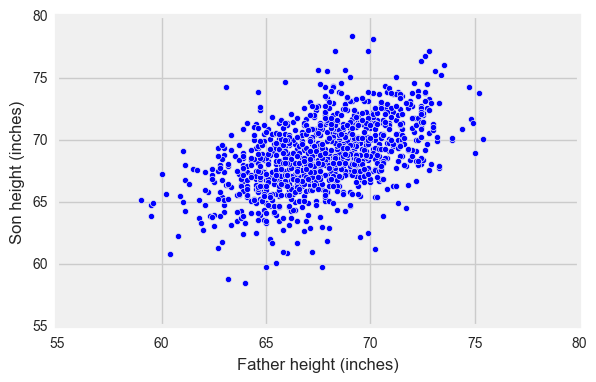

In [3]:
plt.scatter(heights.column(0), heights.column(1))
plt.xlabel('Father height (inches)')
plt.ylabel('Son height (inches)')

In [5]:
fathers = heights.column(0)
sons = heights.column(1)

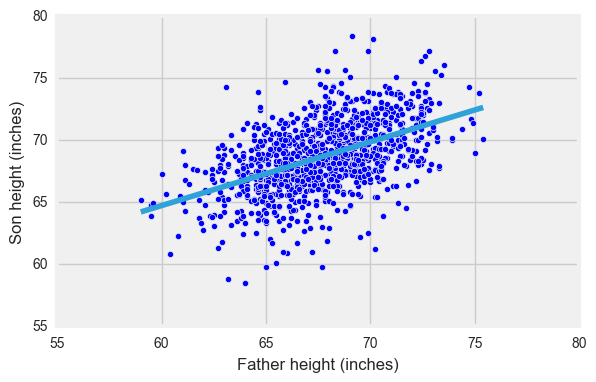

In [6]:
#simple regression model
def reg(x,y):
    x_su = (x - np.mean(x))/np.std(x)
    y_su = (y - np.mean(y))/np.std(y)
    corr = np.mean(x_su*y_su)
    sdx = np.std(x)
    sdy = np.std(y)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    slope = corr*(sdy/sdx)
    intercept = y_bar - slope*x_bar
    return slope, intercept

a, b = reg(fathers,sons)
plt.scatter(heights.column(0), heights.column(1))
x = np.linspace(min(fathers), max(fathers), 10)
plt.plot(x, [a*i+b for i in x])
plt.xlabel('Father height (inches)')
plt.ylabel('Son height (inches)')

## Least Squares Regression

** Residuals:** Difference between fitted value and true value

** OLS Regression minimizes the Mean Squared Error (sum of the square of residuals)**

**Why don't we just minimize the total sum of residuals?**

** Machine Learning Note:** The typical setup in Machine Learning includes a predifined model and a loss function over which we optimize our model parameters. One can also think of regression in this way where we are trying to find the best slope and intercept that minimize $$L(\theta) = \frac{1}{n} \sum_{i=1}^{n} (true\_y - fitted\_y)^2$$


## Diagnosing your regression model - Residual plot 

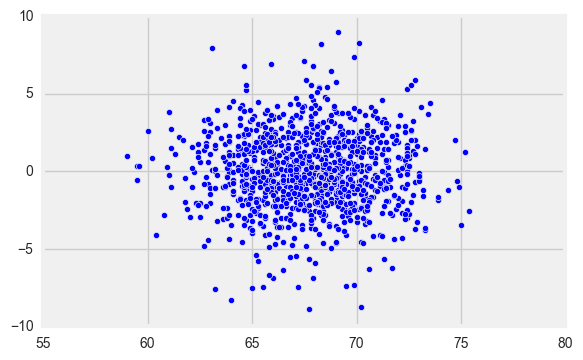

In [7]:
# Diagnose your regression by looking at the residual plot
fitted_values = [a*x+b for x in fathers]
res = sons - fitted_values
plt.scatter(fathers, res) #residual plot

## Regression and inference

Usually we are trying to predict some underlying natural process. But the model we come up with heavily relies on the data that we have at hand. **The true slope might be zero (i.e. no relationship), but due to randomness we might get the impression that there exists a relationship.**

So how do we deal with that situation?

**Null Hypothesis:** The true slope of my regression line is 0 and any other slope that I observe in my data is due to chance.

**Idea:** Bootstrap the scatter plot construct a 95% confidence interval for the slope of the regression model. If that interval does not contain 0, then this provides strong evidence against the null otherwise ...


## Step by step process

1. Bootstrap the scatter plot. 
2. Find the slope of the regression line through the bootstrapped plot. 
3. Repeat

Draw the empirical histogram of all the generated slopes

Get the “middle 95%” interval

That’s an approximate 95% confidence interval for the slope of the true line. 



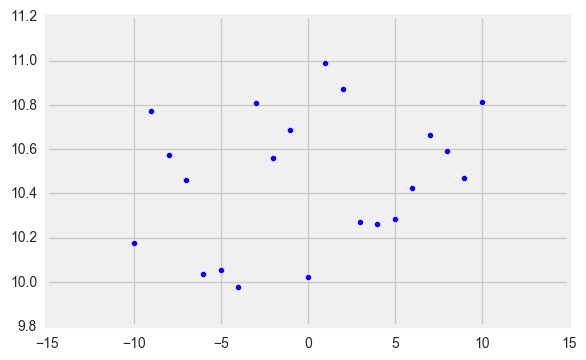

In [32]:
#generate toy dataset
np.random.seed(42)
x = np.arange(-10,11)
y = [0.02*i+10+np.random.rand(1)[0] for i in x]
toy = Table().with_columns('x', x, 'y', y)
plt.scatter(x,y)

In [33]:
#lets look at that process
slopes = []
for i in range(5000):
    tmp = toy.sample(with_replacement=True) #bootstrap the original dataset
    x = tmp.column(0)
    y = tmp.column(1)
    s, inter = reg(x,y) #calculate slope and intercept
    slopes.append(s) #append to list of calculated slopes

The 95% confidence interval for the slopes is contained in -0.00618660551116 0.0293762984675


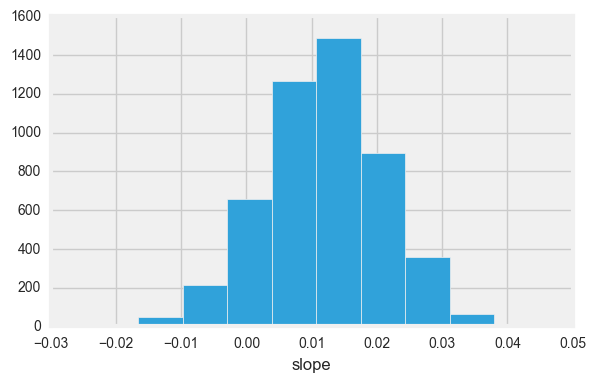

In [34]:
#look at the distribution of the generated slopes
plt.hist(slopes)
plt.xlabel("slope")
print("The 95% confidence interval for the slopes is contained in", np.percentile(slopes, 2.5),np.percentile(slopes, 97.5))

**Remember** Everything is based on the assumption that the regression model holds, e.g. that there is a true linear relationship between the variables!
 

### How the minimize function you will see in lab works

**How minimize works:**


**First, define a function that takes numerical arguments and returns a number.**

**Make sure it's a function with just one minimum value**.

__Example 1__

```ns = make_array(1, 2, 3, 4, 15)
def squared_diff(x):
    return sum((ns - x)**2)
minimize(squared_diff)       # Returns 5, the mean of ns!```

__Example 2__

```def abs_diff(x):
    return sum(np.abs(ns - x))
minimize(abs_diff)           # Returns 3, the median of ns!```


If the function that is minimized has two or more arguments, then the result of calling minimize is an array with one value for each argument.

__Example 3__

```def both(x, y):
    return sum((ns - x)**2) + sum(np.abs(ns - y))
minimize(both)  # Returns an array [5, 3]; the mean & median```


## Move to slides for practice problems! (By Vinitra Swami)